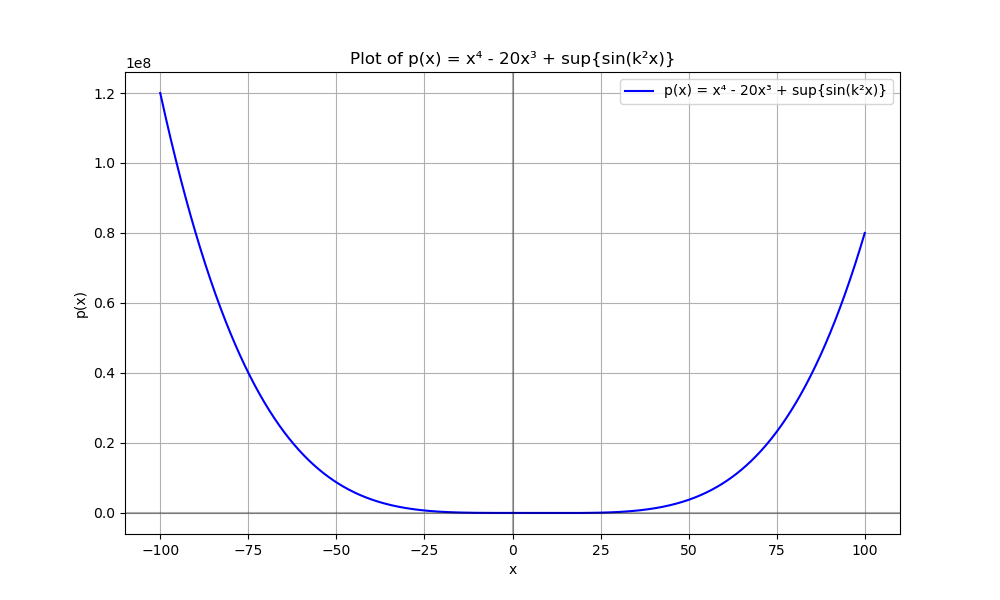

In [3]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-100,100, 1000)  # Create x values with sufficient range
y = x**4 - 20*x**3 + 1  # The supremum of sin(k^2*x) is 1

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', label='p(x) = x⁴ - 20x³ + sup{sin(k²x)}')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('Plot of p(x) = x⁴ - 20x³ + sup{sin(k²x)}')
plt.legend()
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.show()

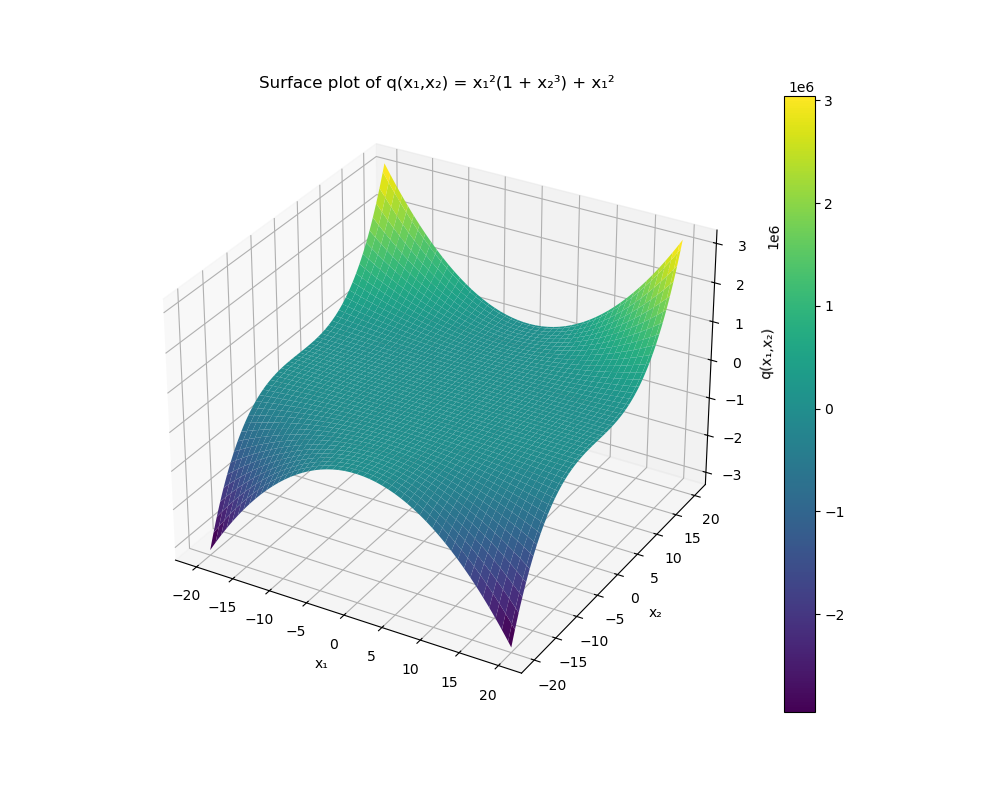

In [4]:
# Create a grid of x1 and x2 values
x1 = np.linspace(-20, 20, 100)
x2 = np.linspace(-20, 20, 100)
X1, X2 = np.meshgrid(x1, x2)

# Calculate function values
Z = X1**2 * (1 + X2**3) + X1**2

# Create 3D surface plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X1, X2, Z, cmap='viridis')

# Add labels and title
ax.set_xlabel('x₁')
ax.set_ylabel('x₂')
ax.set_zlabel('q(x₁,x₂)')
ax.set_title('Surface plot of q(x₁,x₂) = x₁²(1 + x₂³) + x₁²')

# Add colorbar
fig.colorbar(surf)

plt.show()

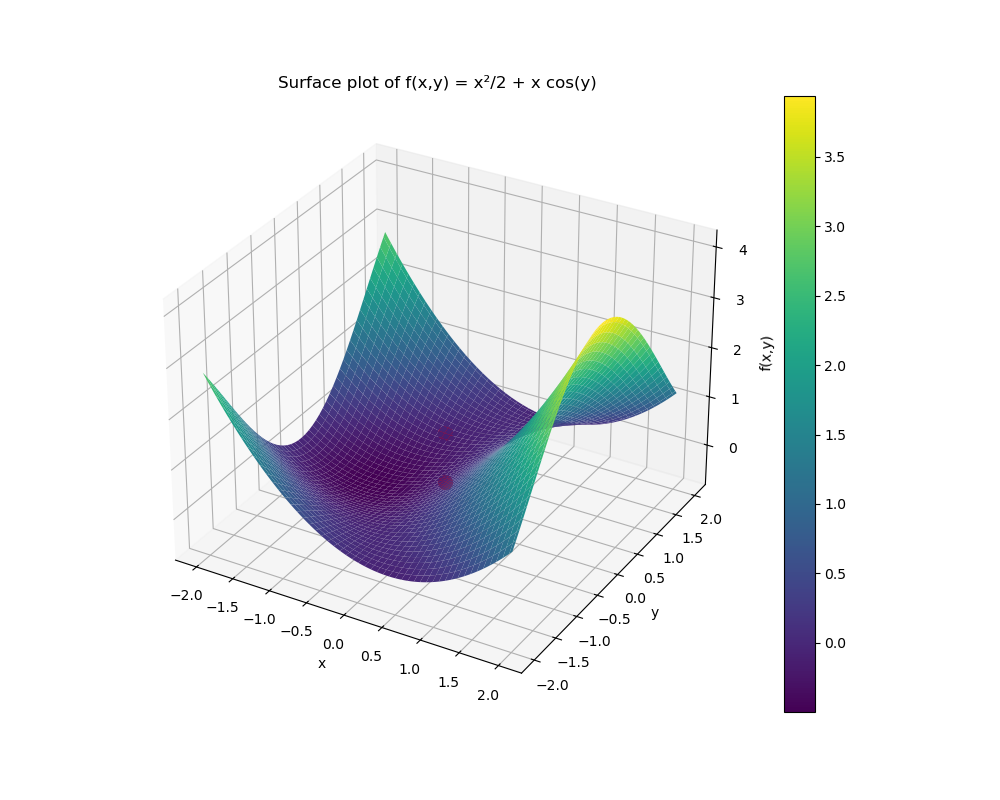

In [5]:
# Create grid of x and y values
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)

# Calculate function values
Z = X**2/2 + X * np.cos(Y)

# Create 3D surface plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis')
ax.scatter(0, 0, 0, color='red', s=100)  # Mark the minimum
ax.scatter(0, 0, 1, color='red', s=100)  # Mark the maximum
# Add labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.set_title('Surface plot of f(x,y) = x²/2 + x cos(y)')

# Add colorbar
fig.colorbar(surf)

plt.show()

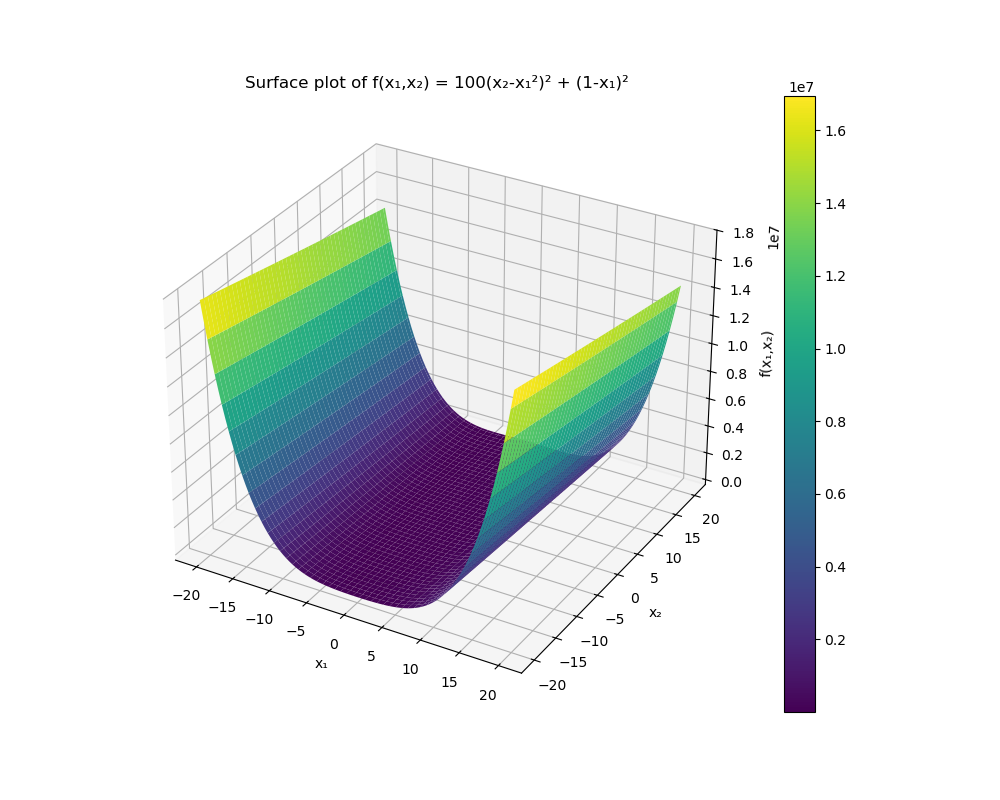

In [6]:
# Create grid of x1 and x2 values
x1 = np.linspace(-20, 20, 100)
x2 = np.linspace(-20, 20, 100)
X1, X2 = np.meshgrid(x1, x2)

# Calculate Rosenbrock function
Z = 100*(X2 - X1**2)**2 + (1 - X1)**2

# Create 3D surface plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X1, X2, Z, cmap='viridis')

# Add labels and title 
ax.set_xlabel('x₁')
ax.set_ylabel('x₂')
ax.set_zlabel('f(x₁,x₂)')
ax.set_title('Surface plot of f(x₁,x₂) = 100(x₂-x₁²)² + (1-x₁)²')

# Add colorbar
fig.colorbar(surf)

plt.show()

Hessian matrix:
Matrix([[4, 1, 0], [1, 2, 1], [0, 1, 2]])

Eigenvalues: {8/3 - (1 + 3*sqrt(111)*I)**(1/3)/3 - 10/(3*(1 + 3*sqrt(111)*I)**(1/3)): 1, 8/3 - (-1/2 + sqrt(3)*I/2)*(1 + 3*sqrt(111)*I)**(1/3)/3 - 10/(3*(-1/2 + sqrt(3)*I/2)*(1 + 3*sqrt(111)*I)**(1/3)): 1, 8/3 - 10/(3*(-1/2 - sqrt(3)*I/2)*(1 + 3*sqrt(111)*I)**(1/3)) - (-1/2 - sqrt(3)*I/2)*(1 + 3*sqrt(111)*I)**(1/3)/3: 1}

Critical point:
{x: 6/5, y: 6/5, z: 17/5}

Minimum value: -12.399999999999999


/var/folders/ln/kg8qyxx52059p3bjyg6mllf40000gn/T/ipykernel_48699/1311234103.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(10, 8))


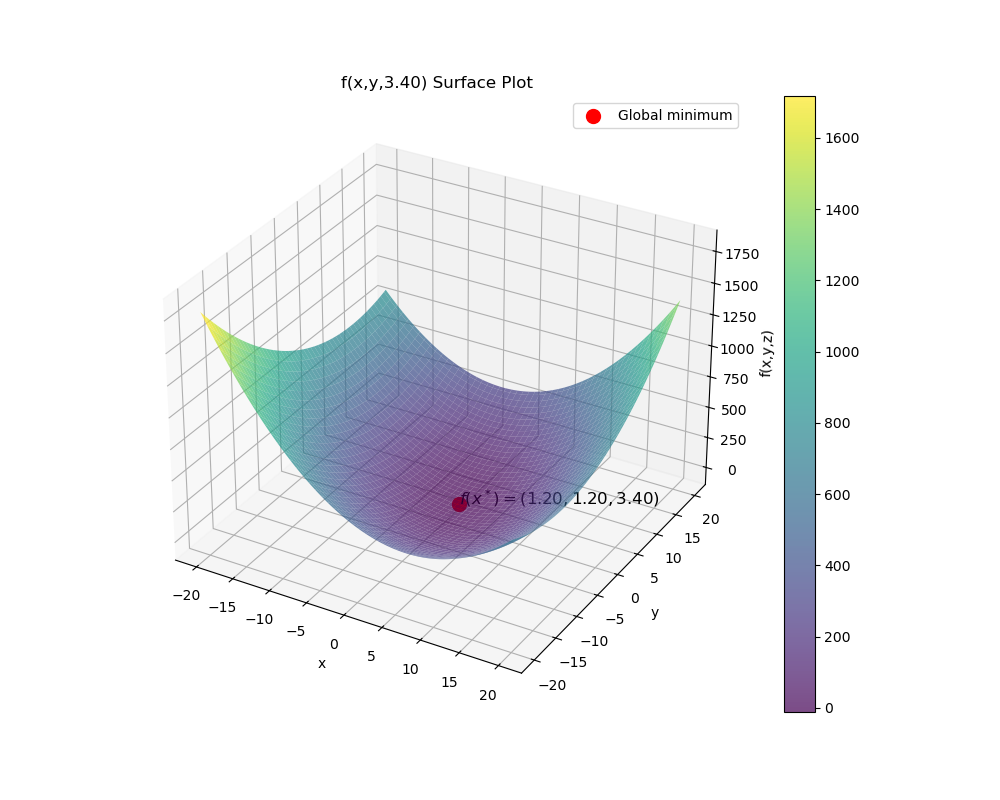

In [23]:
from sympy import symbols, hessian, Matrix
from sympy import solve, diff

# Define the function f(x,y,z)
def f(x, y, z):
    return 2*x**2 + x*y + y**2 + y*z + z**2 - 6*x - 7*y - 8*z + 9

# Calculate the Hessian matrix symbolically to check convexity
x, y, z = symbols('x y z')
f_symbolic = 2*x**2 + x*y + y**2 + y*z + z**2 - 6*x - 7*y - 8*z + 9
H = hessian(f_symbolic, (x, y, z))
print("Hessian matrix:")
print(H)

# Check if Hessian is positive definite (eigenvalues > 0)
eigenvals = Matrix(H).eigenvals()
print("\nEigenvalues:", eigenvals)

# Find critical points by solving gradient = 0
grad_x = diff(f_symbolic, x)
grad_y = diff(f_symbolic, y)
grad_z = diff(f_symbolic, z)
solution = solve((grad_x, grad_y, grad_z), (x, y, z))

print("\nCritical point:")
print(solution)

# Evaluate the function at the critical point
x_min, y_min, z_min = solution[x], solution[y], solution[z]
min_value = f(float(x_min), float(y_min), float(z_min))
print(f"\nMinimum value: {min_value}")

# Create a 3D visualization of f(x,y,z)
l = 20

x_range = np.linspace(-l, l, 100)
y_range = np.linspace(-l, l, 100)
z_opt = float(z_min)


X, Y = np.meshgrid(x_range, y_range)
Z = f(X, Y, z_opt)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7, zorder=5)
ax.scatter(float(x_min), float(y_min), min_value, color='red', s=100, label='Global minimum', zorder=10)
ax.text(float(x_min), float(y_min), min_value, f'$f(x^*) = ({x_min:.2f}, {y_min:.2f}, {z_min:.2f})$', color='black', fontsize=12)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y,z)')
ax.set_title(f'f(x,y,{z_opt:.2f}) Surface Plot')
plt.colorbar(surf)
plt.legend()
plt.show()

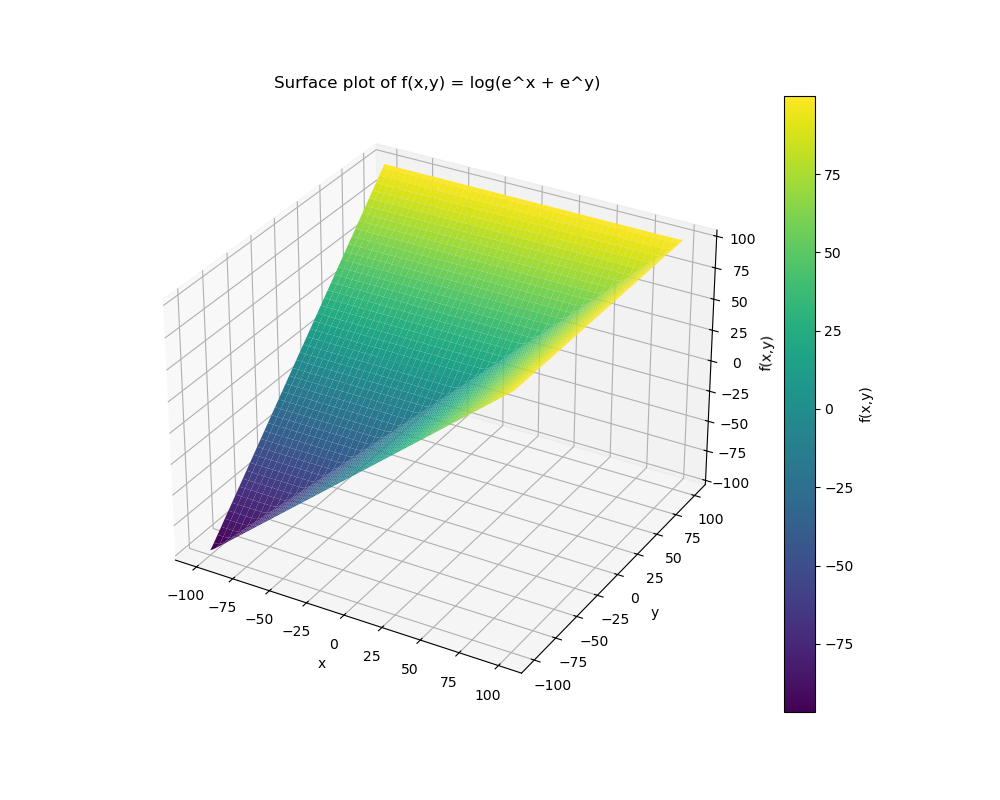

In [46]:
# Create grid of x and y values
l = 100
k = 100
x = np.linspace(-l, l, 100)
y = np.linspace(-k, k, 100)

X, Y = np.meshgrid(x, y)

# Calculate function values
Z = np.log(np.exp(X) + np.exp(Y))

# Create 3D surface plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis')
cb = fig.colorbar(surf)

# Add labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.set_title('Surface plot of f(x,y) = log(e^x + e^y)')
cb.set_label('f(x,y)')


plt.show()